# Deep Learning for Computer Vision

## DisasterGuard: A Deep Learning Framework For Robust Disaster Image Classification

# Team: 27

# Members: Sakshi Satpathy(ss6981), Vrinda Bhat(vgb2113), Ketki Morabkar(km3934)

Dataset Link: https://drive.google.com/drive/folders/1hzgSPLqNt8PG1VHz8la7qZW3OmMISgNe?usp=sharing

# Model 1: ResNet 50

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Import TensorFlow and relevant layers
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D

# Import operating system module
import os

# Define the path to the dataset folder
folder_path = '../input/aider-dataset/AIDER/'
for dirname, _, filenames in os.walk(folder_path):
    print(dirname)

In [ ]:
from keras.preprocessing import image # Import image preprocessing module from Keras
import matplotlib.pyplot as plt # Import pyplot from Matplotlib for plotting
import matplotlib.image as mpimg # Import image module from Matplotlib for reading and displaying images
%matplotlib inline # Enable inline plotting in Jupyter Notebooks

In [ ]:
# Create an ImageDataGenerator for training data augmentation
train_datagen = ImageDataGenerator(
                fill_mode = 'nearest', # Strategy for filling in newly created pixels during data augmentation
                validation_split=0.2   # Fraction of the data to reserve for validation
)

In [ ]:
# Generate a training data generator using ImageDataGenerator
train_generator=train_datagen.flow_from_directory(
    folder_path,
    target_size=(108,108),
    color_mode='rgb',
    class_mode='categorical',
    subset='training',
)

# Generate a validation data generator using ImageDataGenerator
validation_generator=train_datagen.flow_from_directory(
    folder_path,
    target_size=(108,108),
    color_mode='rgb',
    class_mode='categorical',
    subset='validation',
)

Found 5147 images belonging to 5 classes.
Found 1286 images belonging to 5 classes.


In [ ]:
# Import ResNet50 model from Keras applications
from keras.applications import ResNet50

# Create a sequential model
model = tf.keras.models.Sequential([
    ResNet50(input_shape=(108,108,3), include_top=False),
])

# Freeze the layers of the pre-trained ResNet50 model
for layer in model.layers:
  layer.trainable = False

# Add additional layers to the model
model.add(Conv2D(64, (3,3), activation='relu')) # Convolutional layer with ReLU activation
model.add(MaxPooling2D(2,2))                    # Max pooling layer
model.add(Flatten())                            # Flatten layer to convert 2D to 1D
model.add(Dense(64, activation='relu'))         # Dense layer with ReLU activation
model.add(Dropout(0.4))                         # Dropout layer for regularization
model.add(Dense(5, activation='softmax'))       # Output layer with softmax activation for multi-class classification

# Display a summary of the model architecture
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 4, 4, 2048)        23587712  
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 64)          1179712   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 5)                

In [ ]:
# Compile the model with specified optimizer, loss function, and evaluation metric
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Train the model using the provided data generators
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=25,
                    verbose=1,
                    )

Epoch 1/25
161/161 [==============================] - 47s 272ms/step - loss: 1.4624 - accuracy: 0.6720 - val_loss: 0.3163 - val_accuracy: 0.8880
Epoch 2/25
161/161 [==============================] - 30s 188ms/step - loss: 0.3823 - accuracy: 0.8745 - val_loss: 0.4589 - val_accuracy: 0.8631
Epoch 3/25
161/161 [==============================] - 30s 186ms/step - loss: 0.2103 - accuracy: 0.9318 - val_loss: 0.4049 - val_accuracy: 0.8756
Epoch 4/25
161/161 [==============================] - 30s 187ms/step - loss: 0.1804 - accuracy: 0.9459 - val_loss: 0.4083 - val_accuracy: 0.8888
Epoch 5/25
161/161 [==============================] - 30s 188ms/step - loss: 0.1033 - accuracy: 0.9636 - val_loss: 0.3919 - val_accuracy: 0.8966
Epoch 6/25
161/161 [==============================] - 30s 186ms/step - loss: 0.0989 - accuracy: 0.9725 - val_loss: 0.3778 - val_accuracy: 0.9005
Epoch 7/25
161/161 [==============================] - 30s 188ms/step - loss: 0.0748 - accuracy: 0.9799 - val_loss: 0.4497 - val_ac

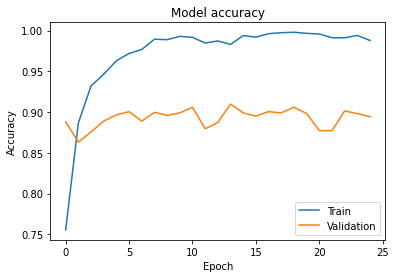

In [ ]:
# Plot training and validation accuracy over epochs

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

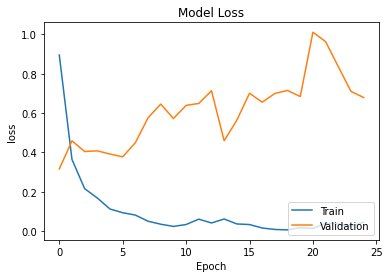

In [ ]:
# Plot training and validation loss over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()